In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data            # MNIST handwritten digits data!
import matplotlib.pyplot as plt
%matplotlib inline

## Download the MNIST data:

In [ ]:
# verbosity_saved = tf.logging.get_verbosity()                        # Save the current verbosity lebel if needed.
tf.logging.set_verbosity(tf.logging.ERROR)                            # Set the verbosity lebel high so that most warnings are ignored. 
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)         # Download the data.
type(mnist)                                                           # Check the type.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


tensorflow.contrib.learn.python.learn.datasets.base.Datasets

## Take a look at the dataset:

In [ ]:
print("Training data X shape: {}".format((mnist.train.images).shape))
print("Training data y shape: {}".format((mnist.train.labels).shape))
print("Training data cases: {}".format(mnist.train.num_examples))
print("\n")
print("Testing data X shape: {}".format((mnist.test.images).shape))
print("Testing data y shape: {}".format((mnist.test.labels).shape))
print("Testing data cases: {}".format(mnist.test.num_examples))

Training data X shape: (55000, 784)
Training data y shape: (55000, 10)
Training data cases: 55000


Testing data X shape: (10000, 784)
Testing data y shape: (10000, 10)
Testing data cases: 10000


Visualization.

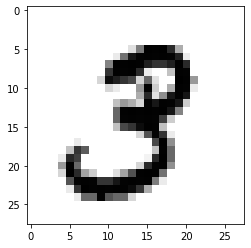

In [ ]:
i_image= 1                                                    # Image index. You can change it at will.
a_single_image = mnist.train.images[i_image].reshape(28,28)     #  Reshape as a 2D array.
plt.imshow(1-a_single_image, cmap='gist_gray')                  #  Display as grayscale image.
plt.show()

In [ ]:
# Check for the minimum and maximum pixel value.
# The data has been min-max-scaled already!
print("MIN : {}".format(a_single_image.min()))                 
print("MAX : {}".format(a_single_image.max())) 

MIN : 0.0
MAX : 1.0


## Do the necessary definitions: 

In [ ]:
batch_size = 30                                # Size of each (mini) batch.
n_epochs  = 20000                              # Number of epochs.
learn_rate = 0.01

- for the sake of simplicity , we have a  single layer `W` of shape ``(784,10)`` with a bias `b` , define these two variables. the initialization of your weights will be zero , use ``tf.zeros``   
- define placeholders for `x` and `y` , make sure to set number of observations undetermined. 

In [ ]:
W = ______
b = ______

In [ ]:
# Single layer.
# Thus, only one set of (b,W) required.
W = tf.Variable(tf.zeros([784,10]))              # Input nodes = 784. Output nodes = 10.
b = tf.Variable(tf.zeros([10]))                  # For each output, a bias is required.

In [ ]:
X_ph = __________   # Indetermined number of cases (observations). Input nodes = 784.
y_ph = __________      # The response variable has been one-hot-encoded. There are 10 output nodes. 

In [ ]:
X_ph = tf.placeholder(tf.float32, [None, 784])   # Indetermined number of cases (observations). Input nodes = 784.
y_ph = tf.placeholder(tf.float32,[None,10])      # The response variable has been one-hot-encoded. There are 10 output nodes. 

- define y_model , recall that $y\_model = X . W + b$
- define the appropriate loss and choose the optimizer Adam 
- define `train` varialbe using optimizer which will minimise the loss
- set `init` initializer as we did before 

In [ ]:
y_model = ______

In [ ]:
# A single layer model.
# Not strictly necessary to apply the softmax activation. => in the end we will apply argmax() function to predict the label!
# y_model = tf.nn.softmax(tf.matmul(X_ph, W) + b)
# The following will work just fine.
y_model = tf.matmul(X_ph, W) + b

In [ ]:
loss = ______

In [ ]:
loss  = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_ph, logits=y_model))   # loss = Cross Entropy. 

In [ ]:
optimizer = ________

In [ ]:
optimizer = tf.train.AdamOptimizer(learning_rate = learn_rate)     # A better optimizer.
# optimizer = tf.train.GradientDescentOptimizer(learning_rate = learn_rate)       # A basic optimizer.

In [ ]:
train = ________

In [ ]:
train = optimizer.minimize(loss)

In [ ]:
init = _______

In [ ]:
init = tf.global_variables_initializer()

follow these steps to complete the accuracy functions below : 

- use `tf.equal` between y_true and y_pred , use on both `tf.argmax(....,axis=1)` ,axis=1 means horizontal (row-wise) direction and save it in a variable `correct_predictions`

- average them using `tf.reduce_mean` , don't forget to cast correct_predictions using `tf.cast()` to `tf.float32`



In [ ]:
def accuracy_func(y_placeholder,y_model):
    correct_predictions = tf.equal(tf.argmax(y_placeholder, axis=1), tf.argmax(y_model, axis=1))          # In argmax(), axis=1 means horizontal direction.
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32)) 
    return accuracy

In [ ]:
def accucary_func(y_placeholder,session):
    correct_predictions = __________        
    accuracy = ______________
    return accuracy
    

## Training and Testing:

define the training steps on your own this time ! (hint : you can use `mnist.train.next_batch(batch_size)` to generate batches ) 
- for a fast training , we will take only one random batch per epoch. Ideally we would run through all batches , instead we will take only one batch , this is cheap and has much of the same benefit. 

In [ ]:
with tf.Session() as sess:
        # Variables initialization.
        # Training.
        for i in range(n_epochs):
            if (i + 1) % 2000 == 0: print("Step = {}".format(i + 1))                   # Print the step number at every multiple of 2000.
        ###################################################
        ################ write your code here##############""          
        #####################################################
        # Testing.
        accuracy=_______________  
        accuracy_value = sess.run(accuracy, feed_dict={X_ph:mnist.test.images, y_ph:mnist.test.labels})   # Use all of the testing data.

(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784

(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784

(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784

(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784

(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784

(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784

(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784

(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784

(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784

(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784

(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784

(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784

(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784

(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784

(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784

(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784

(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784

(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784

(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784

(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784

(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784

(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784

(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784

(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784

(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784

(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000
(30, 784) 55000


KeyboardInterrupt: 

In [ ]:
with tf.Session() as sess:
        # Variables initialization.
        sess.run(init)
        # Training.
        for i in range(n_epochs):
            batch_X, batch_y = mnist.train.next_batch(batch_size)                      # Sample a batch!
            my_feed = {X_ph:batch_X, y_ph:batch_y}
            sess.run(train, feed_dict = my_feed)
            if (i + 1) % 2000 == 0: print("Step = {}".format(i + 1))                   # Print the step number at every multiple of 2000.
         # Testing.
        correct_predictions = tf.equal(tf.argmax(y_ph, axis=1), tf.argmax(y_model, axis=1))          # In argmax(), axis=1 means horizontal direction.
        accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))                          # Recast the Boolean as float32 first. Then calculate the mean.
        accuracy_value = sess.run(accuracy, feed_dict={X_ph:mnist.test.images, y_ph:mnist.test.labels})   # Use all of the testing data.

 the expected accuracy on  test set.

In [ ]:
print("Accuracy = {:5.3f}".format(accuracy_value))

Accuracy = 0.917


## multi layers

let's define another module with multi layers , with the following properties defined in this graph : 

<img src="./graph.png" /> 

make sure to initialize your weights using normal distribution ( $mu=0 , std=1$ ) using ``tf.random_normal``

In [ ]:
# define your weights variables here 
W1 = ____________
W2 = ___________
b1 = ___________
b2 = ___________
b3 = ___________


In [ ]:
# We are building a multi-layer neural network. Thus, several sets of (b,W) required.
# Parameters that connect the input layer with the first hidden layer. 
W1 = tf.Variable(tf.random_normal([784,30],0,1))   # Input = 784 nodes, Output = 30 nodes.   
b1 = tf.Variable(tf.random_normal([30],0,1))     
# Parameters that connect the first hidden layer with the second hidden layer.
W2 = tf.Variable(tf.random_normal([30,15],0,1))    # Input = 30 nodes, Output = 15 nodes (the same as the number of output nodes at the previous layer).
b2 = tf.Variable(tf.random_normal([15],0,1)) 
# Parameters that connect the second hidden layer with the output layer.
W3 = tf.Variable(tf.random_normal([15,10],0,1))    # Input = 15 nodes, Output = 10 nodes (the same as the number of output nodes at the previous layer).
b3 = tf.Variable(tf.random_normal([10],0,1))

link up your layers using ``tf.matmul`` and wrap each layer output with an activation function , in our case we choose sigmoid using ``tf.nn.sigmoid`` for first and second hidden layer. make sure to respect the order.  

In [ ]:
hidden1 = _____________
hidden2= ______________
y_model = _____________


In [ ]:
# A multi-layer model.
# As before, the Softmax activation at the output layer is optional. 
hidden1 = tf.nn.sigmoid(tf.matmul(X_ph,W1) + b1)
hidden2 = tf.nn.sigmoid(tf.matmul(hidden1,W2) + b2)
y_model =  tf.matmul(hidden2, W3) + b3

create `loss` , `optimizer`, `train` of the second module with the same method as the first one. 

In [ ]:
loss = ______
optimizer = ________
train = ________
init = ________


In [ ]:
loss  = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_ph, logits=y_model))   # loss = Cross Entropy. 


optimizer = tf.train.AdamOptimizer(learning_rate = learn_rate)     # A better optimizer.


train = optimizer.minimize(loss)


init = tf.global_variables_initializer()



train the second module using the same method as the first one

In [ ]:
with tf.Session() as sess:
        ################################## 
        #### write your code here ########
        ##################################

In [ ]:
with tf.Session() as sess:
        # Variables initialization.
        sess.run(init)
        # Training.
        for i in range(n_epochs):
            batch_X, batch_y = mnist.train.next_batch(batch_size)                      # Sample a batch!
            my_feed = {X_ph:batch_X, y_ph:batch_y}
            sess.run(train, feed_dict = my_feed)
            if (i + 1) % 2000 == 0: print("Step = {}".format(i + 1))                   # Print the step number at every multiple of 2000.
         # Testing.
        accuracy = accuracy_func(y_ph,y_model)                          # Recast the Boolean as float32 first. Then calculate the mean.
        accuracy_value = sess.run(accuracy, feed_dict={X_ph:mnist.test.images, y_ph:mnist.test.labels})   # Use all of the testing data.

Step = 2000
Step = 4000
Step = 6000
Step = 8000
Step = 10000
Step = 12000
Step = 14000
Step = 16000
Step = 18000
Step = 20000


this is the expected result

In [ ]:
print("Accuracy = {:5.3f}".format(accuracy_value))

Accuracy = 0.952
